<a href="https://colab.research.google.com/github/CM-007/DS_ASS/blob/main/Ass07_Hierarchical_Clustering(Airlines).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import Hierarchical Clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# **Load data set**

In [30]:
data = pd.read_csv('/content/EastWestAirlines.csv')

# **EDA**

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [32]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [33]:
data.shape

(3999, 12)

# Renaming columns

In [34]:
data = data.rename({'ID#':'ID','Award?':'Award'})

# Finding and romoving NA values

In [35]:
data.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

# **Customized Normalization function**

In [36]:
def norm_func(i):
  x = (i-i.min())/(i.max()-i.min())
  return x

In [37]:
df_norm = norm_func(data.iloc[:,1:])
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


# **Create Dendrogram**

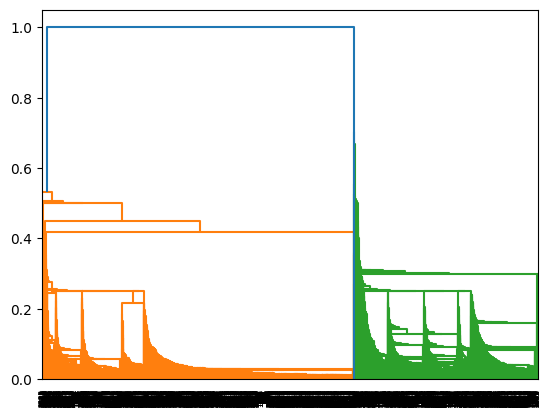

In [38]:
# single linkage method use
dendrogram = sch.dendrogram(sch.linkage(df_norm,method='single'))

In [39]:
hc = AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage = 'single')
hc

AgglomerativeClustering(affinity='euclidean', linkage='single', n_clusters=6)

In [40]:
# save cluster for chart
y_hc = hc.fit_predict(df_norm)
cluster = pd.DataFrame(y_hc,columns=['Cluster'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [41]:
# data['Hierarchical_Cluster'].value_counts()
y_hc

array([2, 2, 2, ..., 0, 2, 2])

In [42]:
cluster

,Cluster
0,2
1,2
2,2
3,2
4,0
...,...
3994,0
3995,0
3996,0
3997,2


In [43]:
# Adding cluster column in main data
data['Hierarchical_Cluster'] = cluster
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchical_Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [44]:
data['Hierarchical_Cluster'].value_counts()

2    2516
0    1478
1       2
4       1
3       1
5       1
Name: Hierarchical_Cluster, dtype: int64

In [45]:
data = data.sort_values('Hierarchical_Cluster') # sorting by asending order

In [46]:
data.iloc[:,[0,12]]

,ID#,Hierarchical_Cluster
1999,2016,0
1513,1528,0
1512,1527,0
3165,3187,0
3167,3189,0
...,...,...
1756,1772,2
3998,4021,2
2840,2862,3
904,915,4


# **END**